In [1]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [2]:
# Pip install method (recommended)

!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.6 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 24.2/78.2 GB disk)


In [3]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="UUR42GjF6pIV2zVkLJe8")
project = rf.workspace("carplate-1g9we").project("carplatedetection-u67lp")
dataset = project.version(4).download("yolov8")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.4/57.4 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.3/155.3 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.5/48.5 kB 6.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 52.3 MB/s eta 0:00:00
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9656 sha256=ecbf29b5c4500d4fee9369269f780e0f2431bc863df12cfb7f974f50a9c43bfa
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.1.0
    Uninstalling pyparsing-3.1.0:
      Su

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.134 is required but found version=8.0.20, to fix: `pip install ultralytics==8.0.134`


Extracting Dataset Version Zip to CarPlateDetection-4 in yolov8:: 100%|██████████| 3420/3420 [00:00<00:00, 4199.11it/s]


In [4]:
from ultralytics import YOLO

from IPython.display import display, Image

In [5]:
pwd

'/content'

In [6]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8x.pt data={dataset.location}/data.yaml epochs=25 imgsz=640

#!yolo task=detect mode=train model=yolov8n.pt imgsz=640 data=custom_data.yaml epochs=10 batch=8 name=yolov8n_custom


/content
100% 131M/131M [00:00<00:00, 237MB/s]

Ultralytics YOLOv8.0.20 🚀 Python-3.10.6 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8x.yaml, data=/content/CarPlateDetection-4/data.yaml, epochs=25, patience=50, batch=16, imgsz=640, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=False, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, o

In [7]:
!ls {HOME}/runs/detect/train/

args.yaml					    val_batch0_labels.jpg
confusion_matrix.png				    val_batch0_pred.jpg
events.out.tfevents.1690648997.c33df42c8c8b.1320.0  val_batch1_labels.jpg
F1_curve.png					    val_batch1_pred.jpg
P_curve.png					    val_batch2_labels.jpg
PR_curve.png					    val_batch2_pred.jpg
R_curve.png					    weights
results.csv


/content


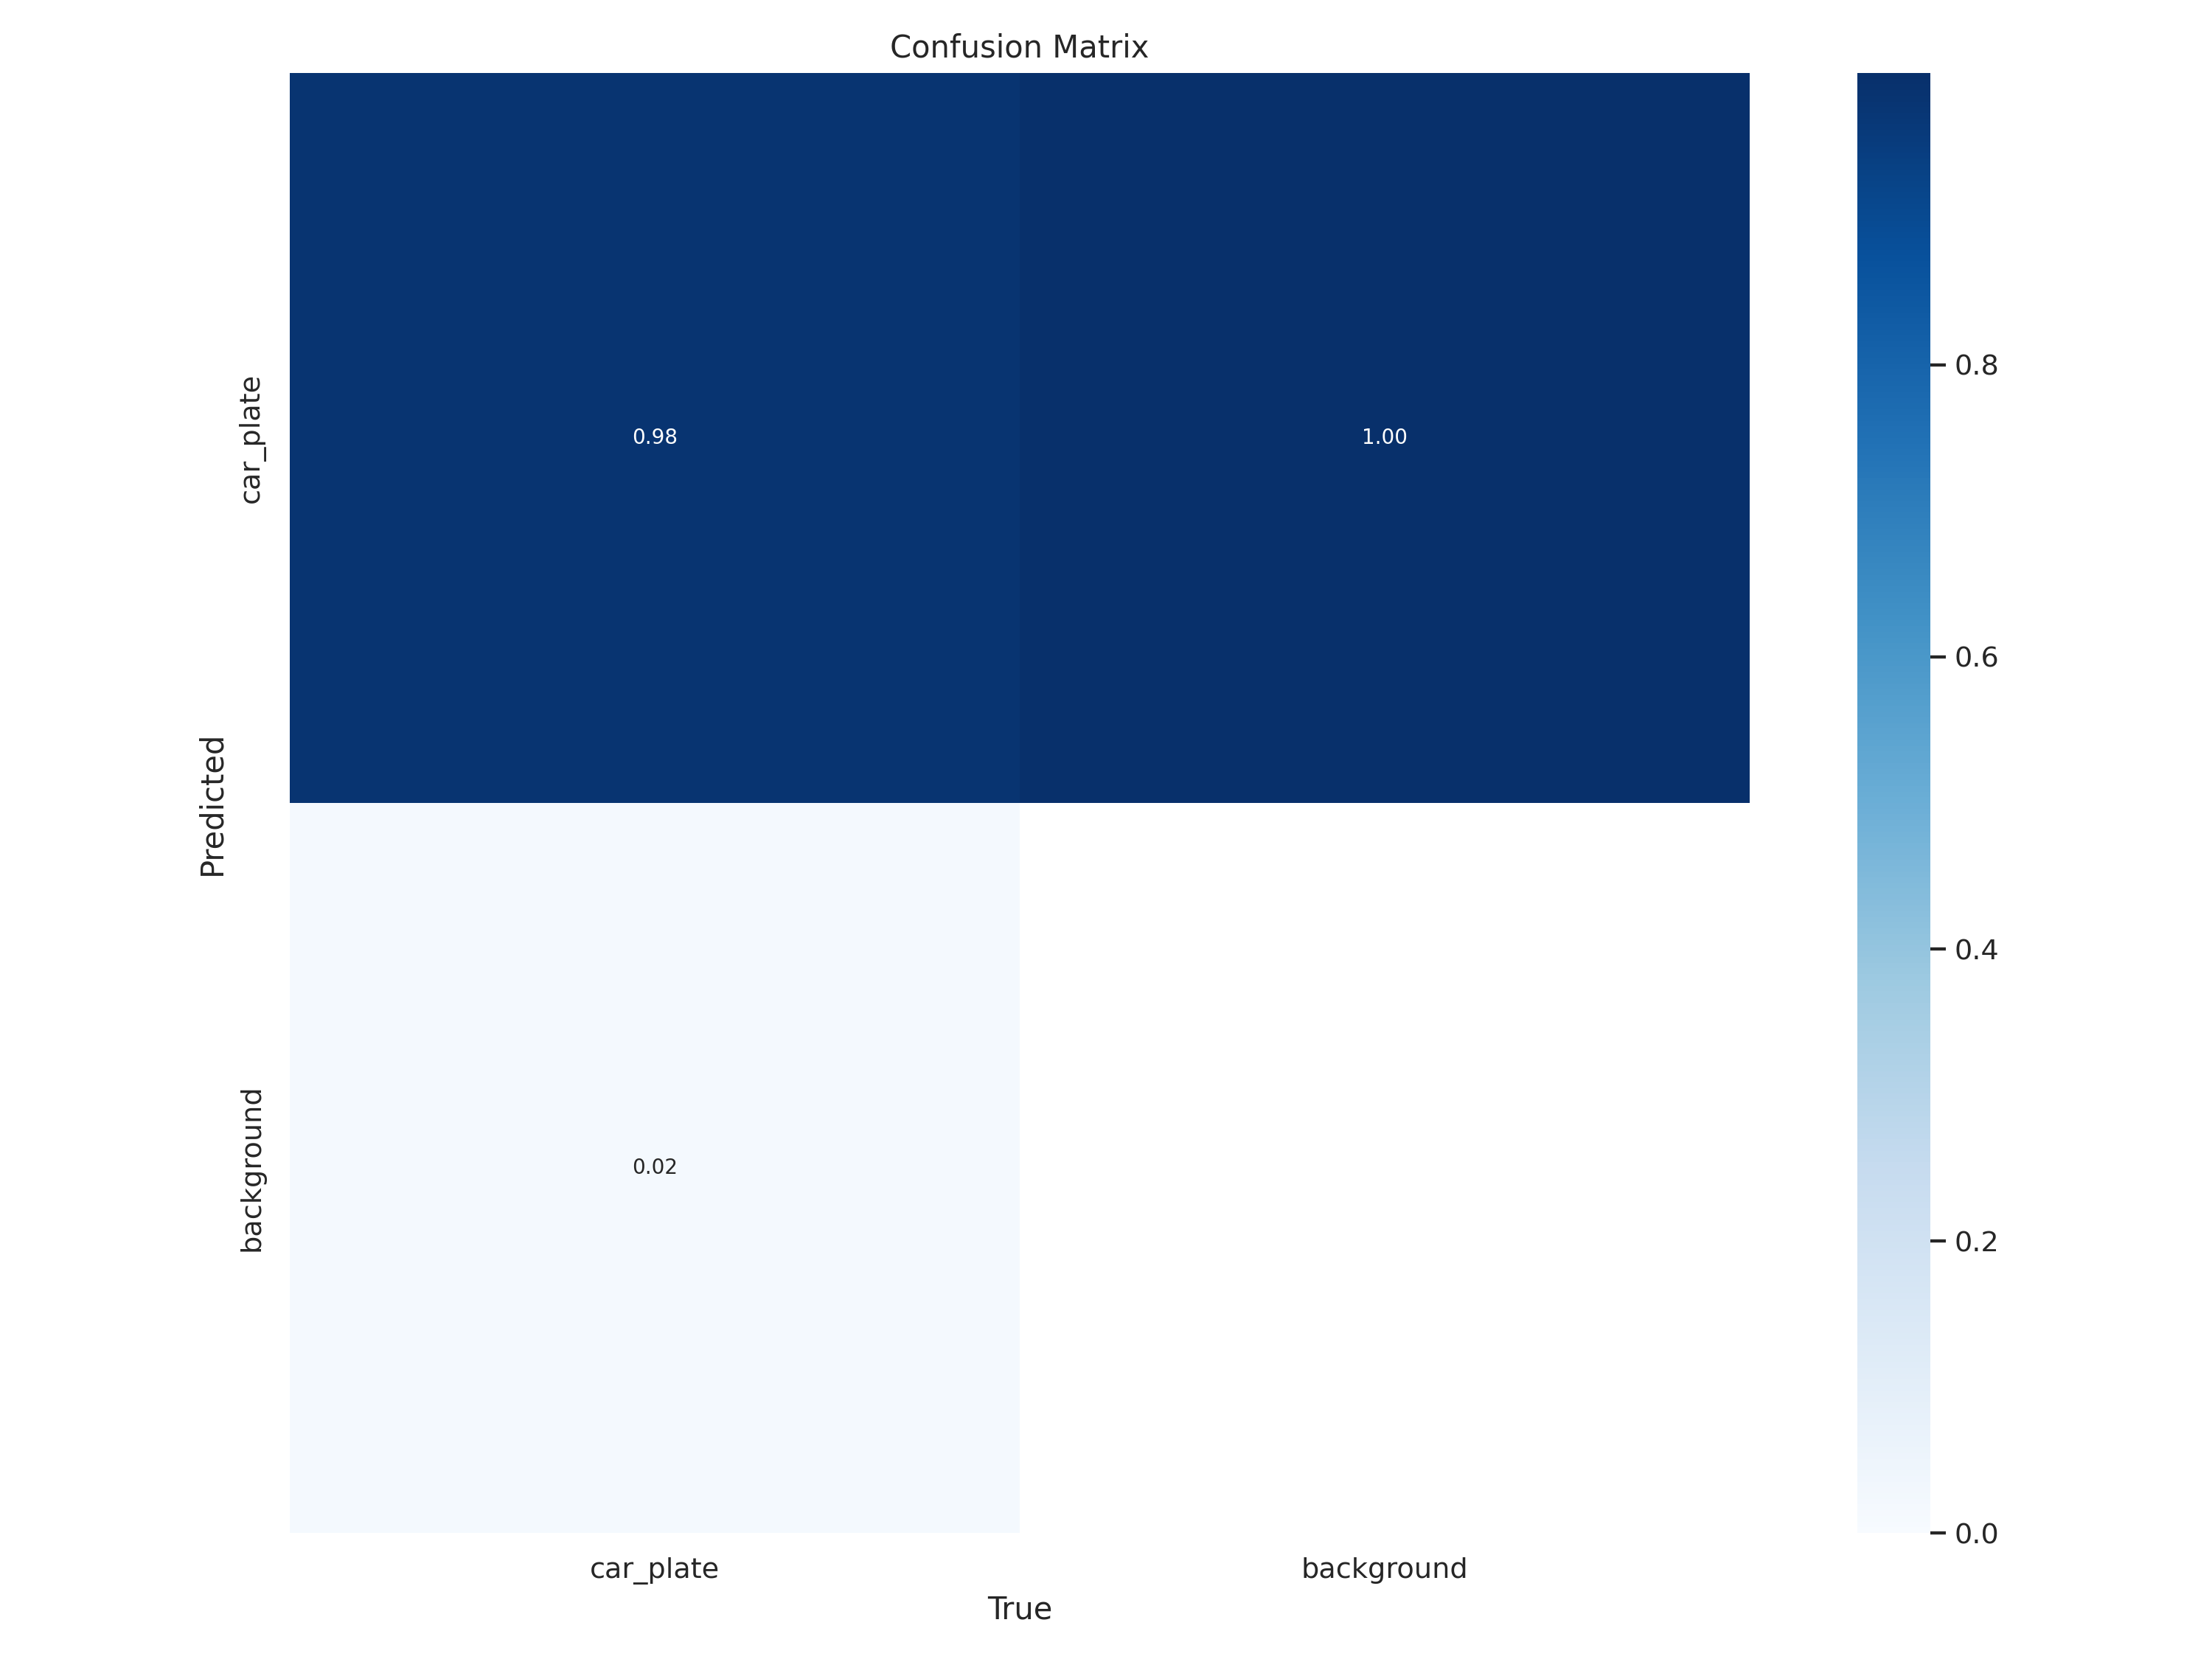

In [8]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/content


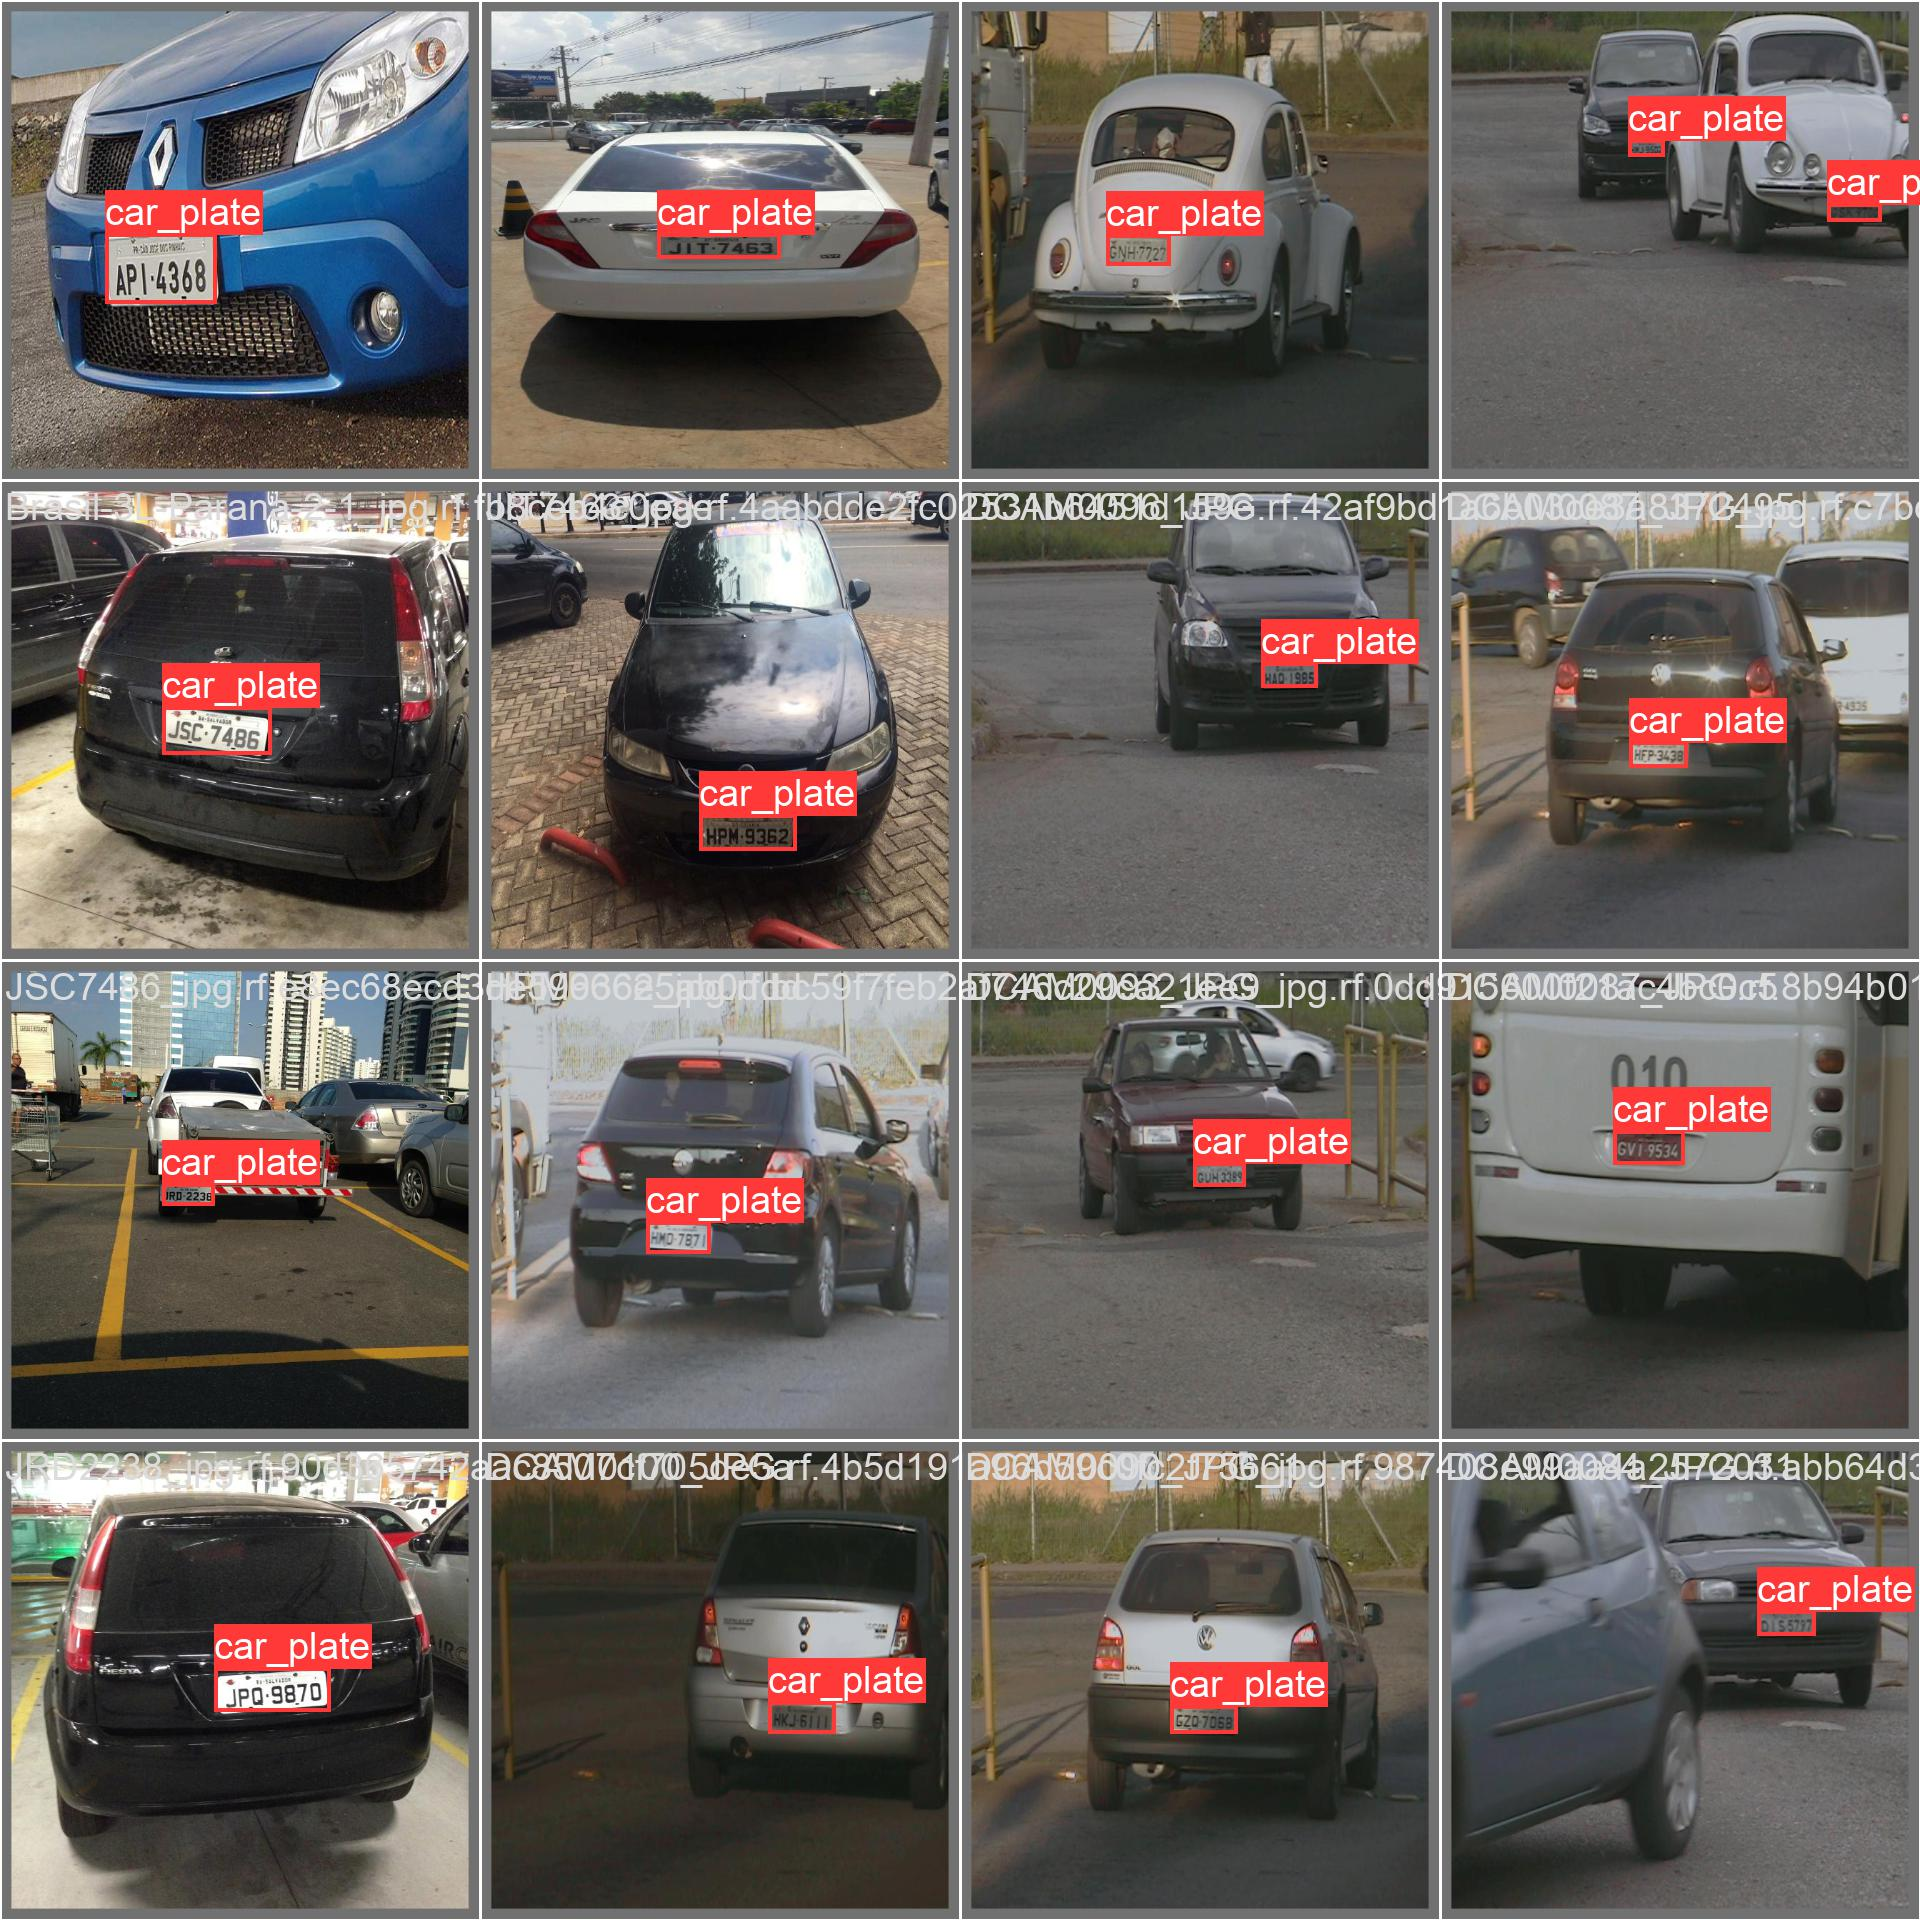

In [9]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_labels.jpg', width=600)

In [14]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
2023-07-29 17:37:56.284442: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-29 17:37:57.154068: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.6 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 68124531 parameters, 0 gradients, 257.4 GFLOPs
val: Scanning /content/CarPlateDetection-4/valid/labels.cache... 118 images, 0 backgrounds, 0 corrupt: 100% 118/118 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 8/8 [00:07<00:00,  1.04it/s]
                   all        118        124      0.991      0.976      0.994      0.851
Speed: 0.2ms pre-process, 56.2ms inferenc

In [15]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
2023-07-29 17:38:14.496152: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-29 17:38:15.335703: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.6 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 68124531 parameters, 0 gradients, 257.4 GFLOPs
image 1/60 /content/CarPlateDetection-4/test/images/306db6d3-imagem-abre_jpeg_jpg.rf.aec4d685766fb9ab65e5703962ed2fae.jpg: 640x640 1 car_plate, 71.7ms
image 2/60 /content/CarPlateDetection-4/test/images/DCAM0006_JPG_jpg.rf.418a987ef9ba590a0e2d05c938b71fa9.jpg: 640x640 1 car_plate, 59.5ms
image 3/60 /content/CarPlateDetection-4/test/images/DCAM0006_JPG_jpg.rf.7a5963a855de1948d8022f76ed

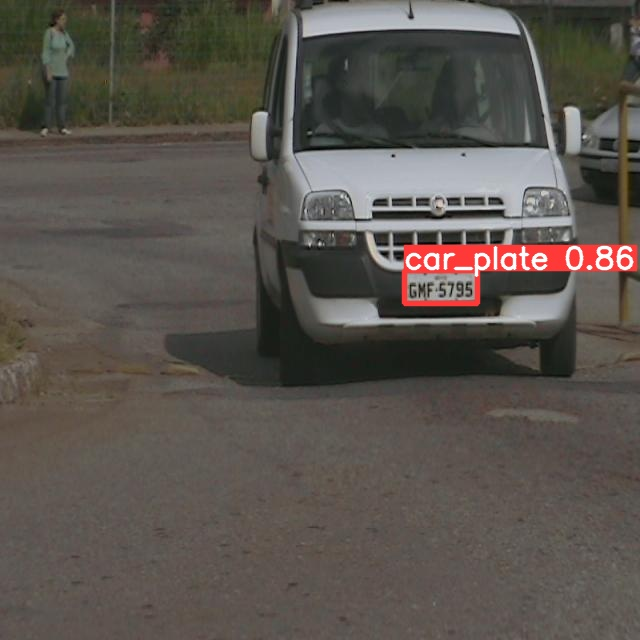

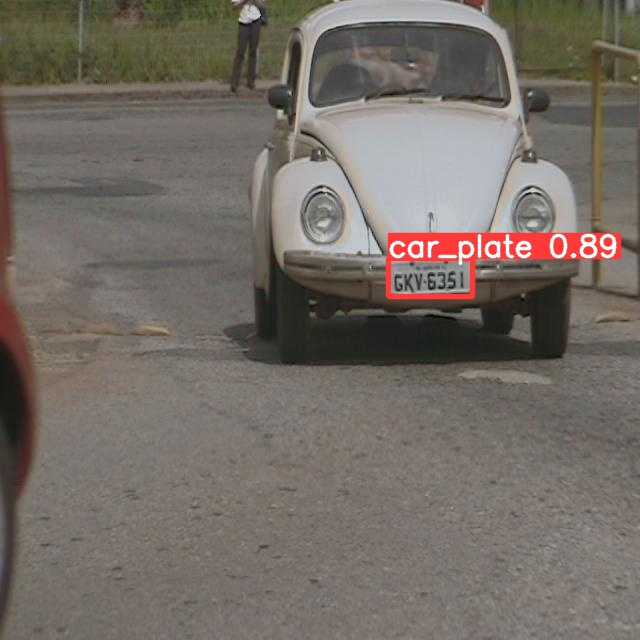

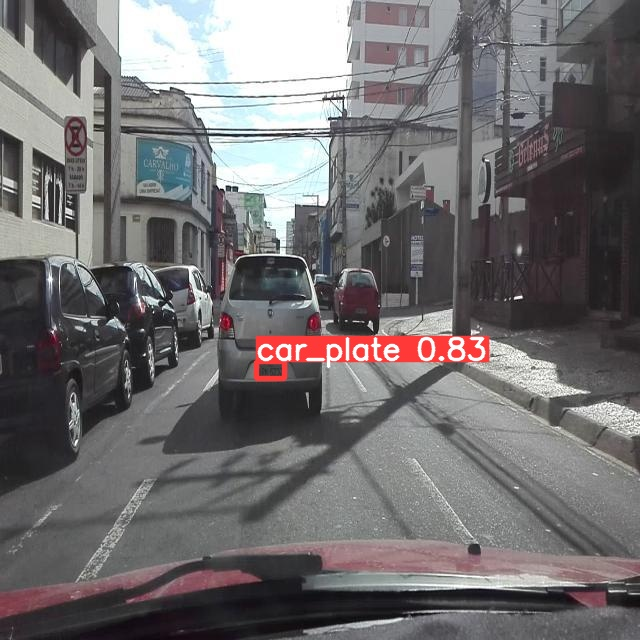

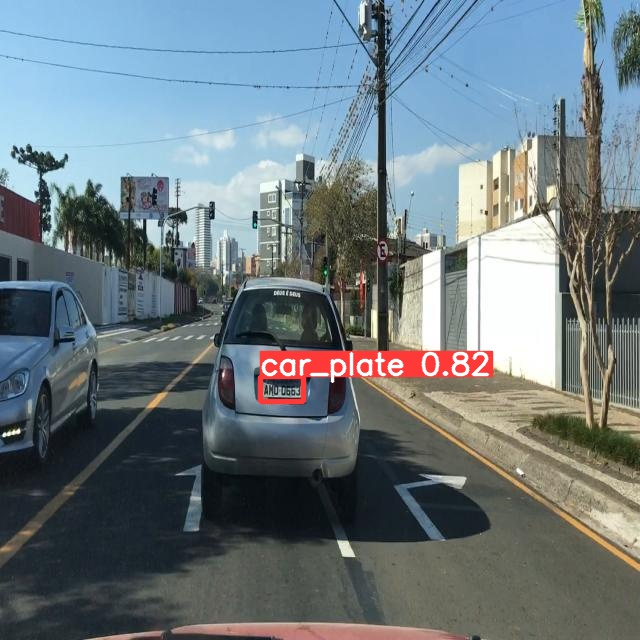

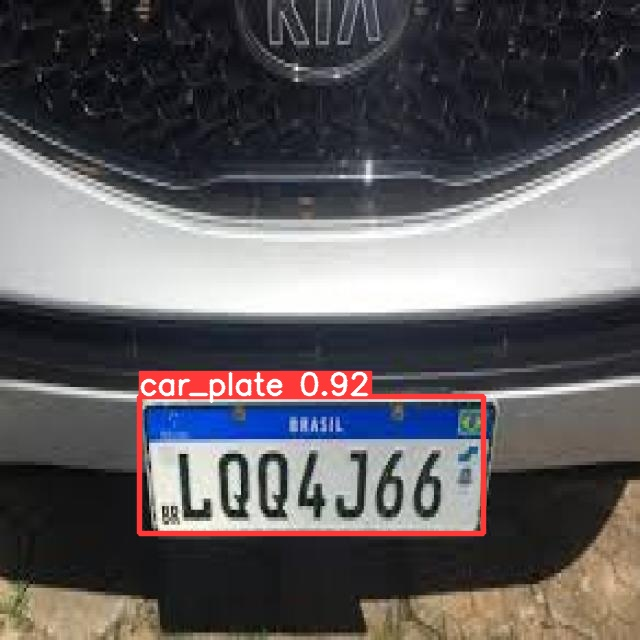

In [16]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg')[:5]:
      display(Image(filename=image_path, width=600))
      print("\n")
